In [1]:
import ROOT
import my_library.common_analysis_tools as ct
import my_library.constants as constants
import numpy as np


Welcome to JupyROOT 6.24/04


In [2]:
ROOT.gStyle.SetOptStat(0)

In [3]:
df_pipkmks = ct.get_dataframe('pipkmks', 'spring', 'data', filtered=False)
df_pimkpks = ct.get_dataframe('pimkpks', 'spring', 'data', filtered=False)

In [4]:
df_pipkmks = df_pipkmks.Define('km_p', 'sqrt(km_px*km_px + km_py*km_py + km_pz*km_pz)')
df_pimkpks = df_pimkpks.Define('kp_p', 'sqrt(kp_px*kp_px + kp_py*kp_py + kp_pz*kp_pz)')

In [5]:
hist_kmp = df_pipkmks.Histo1D(('kmp', 'kmp', 500, 0, 1), 'km_p').GetValue()
hist_kpp = df_pimkpks.Histo1D(('kpp', 'kpp', 500, 0, 1), 'kp_p').GetValue()

Info in <TCanvas::Print>: png file kaon_momentum.png has been created


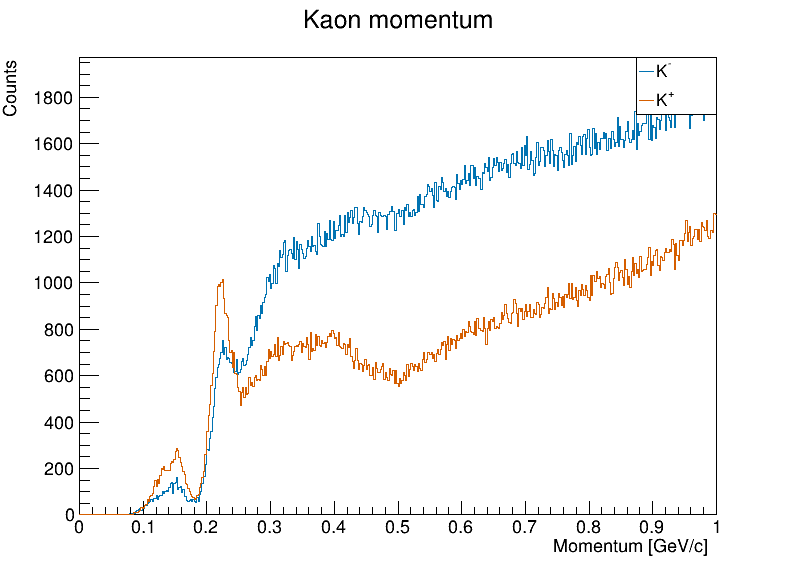

In [6]:
hist_kmp.SetTitle("Kaon momentum")
hist_kmp.GetXaxis().SetTitle("Momentum [GeV/c]")
hist_kmp.GetYaxis().SetTitle("Counts")
hist_kpp.SetTitle("Kaon momentum")
hist_kpp.GetXaxis().SetTitle("Momentum [GeV/c]")
hist_kpp.GetYaxis().SetTitle("Counts")

hist_kmp.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
hist_kpp.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
legend = ROOT.TLegend(0.8, 0.8, 0.9, 0.9)
legend.AddEntry(hist_kmp, "K^{-}", "l")
legend.AddEntry(hist_kpp, "K^{+}", "l")

c = ROOT.TCanvas("c", "c", 800, 600)
hist_kmp.Draw()
hist_kpp.Draw("same")
legend.Draw()
c.Draw()
c.SaveAs("kaon_momentum.png")


In [7]:
@ROOT.Numba.Declare(['float', 'float', 'float'], 'float')
def get_theta(px, py, pz):
    return np.degrees(np.arctan2(np.sqrt(px**2 + py**2), pz))

@ROOT.Numba.Declare(['float', 'float'], 'float')
def get_phi(px, py):
    return np.degrees(np.arctan2(py, px))

In [9]:
df_pipkmks = df_pipkmks.Define("km_theta", "Numba::get_theta(km_px, km_py, km_pz)",)
df_pipkmks = df_pipkmks.Define("km_phi", "Numba::get_phi(km_px, km_py)")

df_pimkpks = df_pimkpks.Define("kp_theta", "Numba::get_theta(kp_px, kp_py, kp_pz)")
df_pimkpks = df_pimkpks.Define("kp_phi", "Numba::get_phi(kp_px, kp_py)")

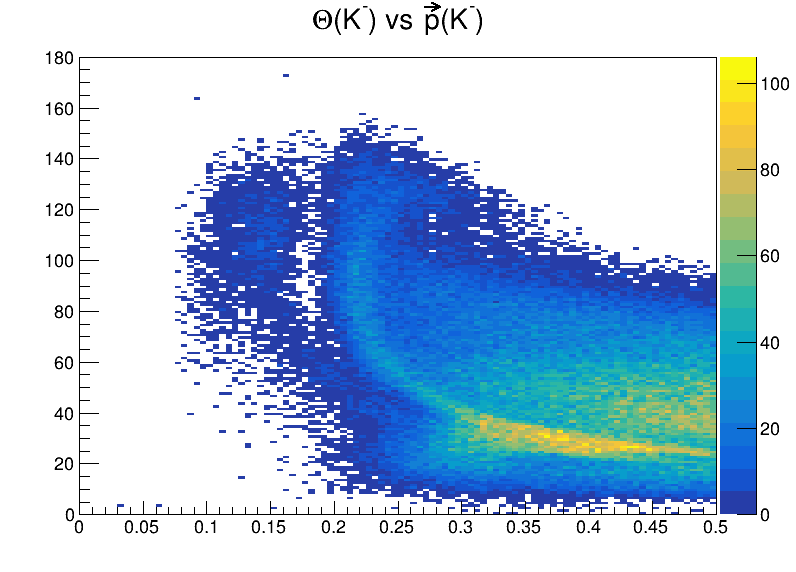

In [11]:
hist_theta_vs_kmp = df_pipkmks.Histo2D(('theta_vs_km_p', '#Theta(K^{-}) vs #vec{p}(K^{-})', 100, 0.0, 0.5, 180, 0, 180), 'km_p', 'km_theta')
hist_theta_vs_kmp.Draw('colz')
c.Draw()

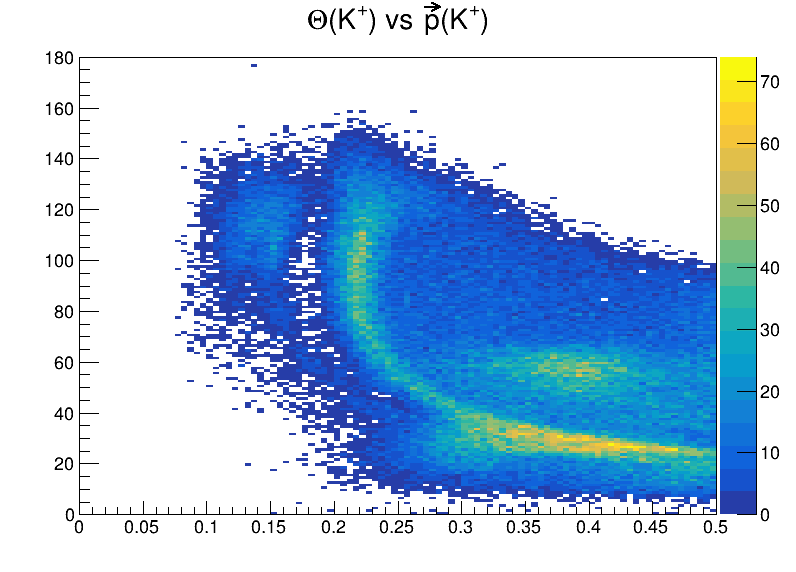

In [12]:
hist_theta_vs_kpp = df_pimkpks.Histo2D(('theta_vs_kp_p', '#Theta(K^{+}) vs #vec{p}(K^{+})', 100, 0.0, 0.5, 180, 0, 180), 'kp_p', 'kp_theta')
hist_theta_vs_kpp.Draw('colz')
c.Draw()

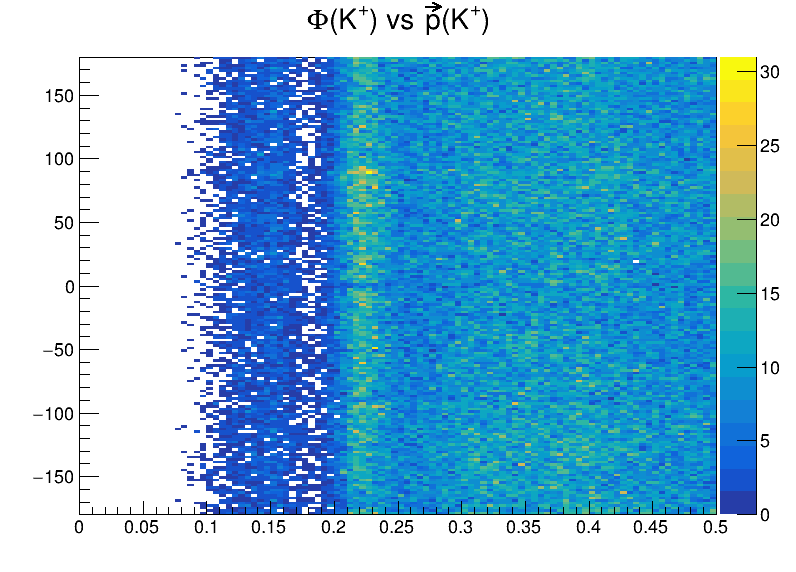

In [14]:
hist_phi_vs_kpp = df_pimkpks.Histo2D(('phi_vs_kp_p', '#Phi(K^{+}) vs #vec{p}(K^{+})', 100, 0.0, 0.5, 180, -180, 180), 'kp_p', 'kp_phi')
hist_phi_vs_kpp.Draw('colz')
c.Draw()

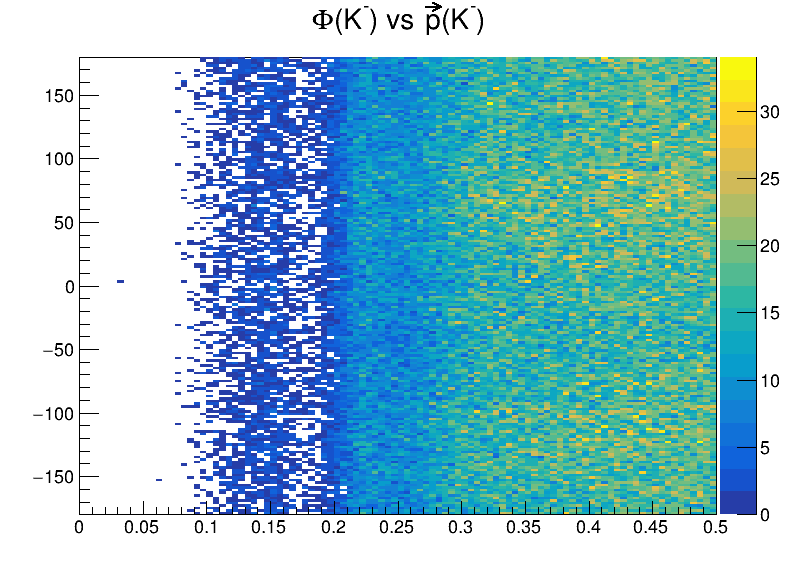

In [13]:
hist_phi_vs_kpp = df_pipkmks.Histo2D(('phi_vs_km_p', '#Phi(K^{-}) vs #vec{p}(K^{-})', 100, 0.0, 0.5, 180, -180, 180), 'km_p', 'km_phi')
hist_phi_vs_kpp.Draw('colz')
c.Draw()